In [83]:
from configure_dataframes import directory_to_dataframe
from check_labels import (
    load_model,
    get_features,
    scale_and_reduce,
    plot_features,
    display_misclassified_images,
    train_and_identify_misclassifications,
    train_and_plot_svm,
)

In [84]:
import matplotlib.pyplot as plt

recall = 0.9962
precision = 0.9215
f1 = 0.9569
recall_std = 0.001789
precision_std = 0.0427
f1_std = 0.02372

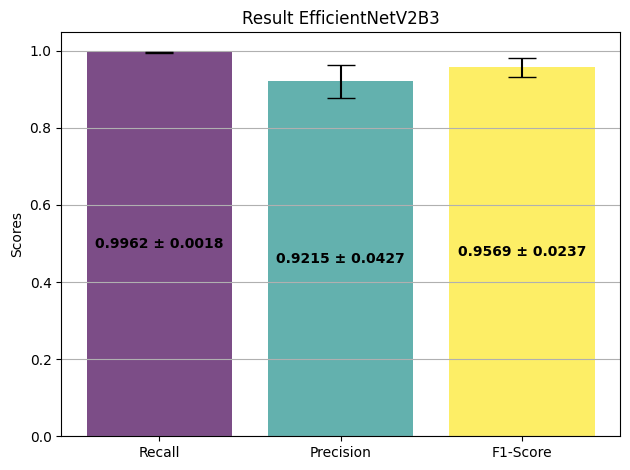

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ["Recall", "Precision", "F1-Score"]
values = [recall, precision, f1]
errors = [recall_std, precision_std, f1_std]

# Create a bar chart
x_pos = np.arange(len(labels))
fig, ax = plt.subplots()

# Use color palette for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

bars = ax.bar(
    x_pos,
    values,
    yerr=errors,
    align="center",
    alpha=0.7,
    color=colors,
    capsize=10,
    label="_nolegend_",
)
ax.set_ylabel("Scores")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title("Result EfficientNetV2B3")
ax.yaxis.grid(True)

# Add the actual values inside the bars
for idx, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(
        f"{height:.4f} ± {errors[idx]:.4f}",
        xy=(bar.get_x() + bar.get_width() / 2, height / 2),
        ha="center",
        va="center",
        color="black",
        fontsize=10,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

In [86]:
df = directory_to_dataframe("data")

In [87]:
to_check = [
    "australia_assa_02",
    "australia_assa_62",
    "india_ooty_01",
    "glasgow_59",
    "swiss_landschlacht_01",
    "alaska_haarp_62",
    "humain_59",
]

In [88]:
to_check = [
    "australia_assa_02",
    "swiss_landschlacht_01",
    "alaska_haarp_62",
]

In [89]:
df = df[df.instrument.isin(["india_ooty_01"])]
df.loc[:, "is_burst"] = df["burst_type"].apply(lambda x: 1 if x != "no_burst" else 0)

In [90]:
# Take sample
df = df.groupby("label").sample(n=200)
df = df.sort_values(by=["start_time"])

In [91]:
image_paths = df["file_path"].values

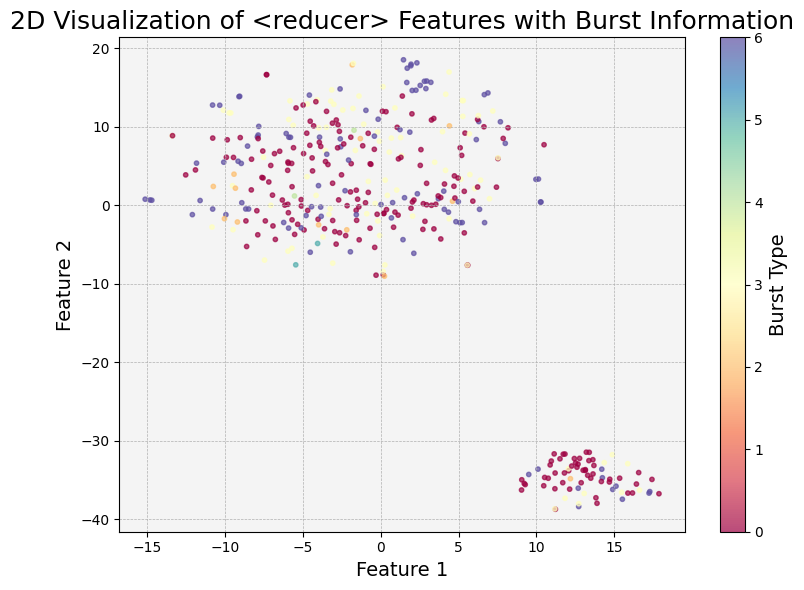

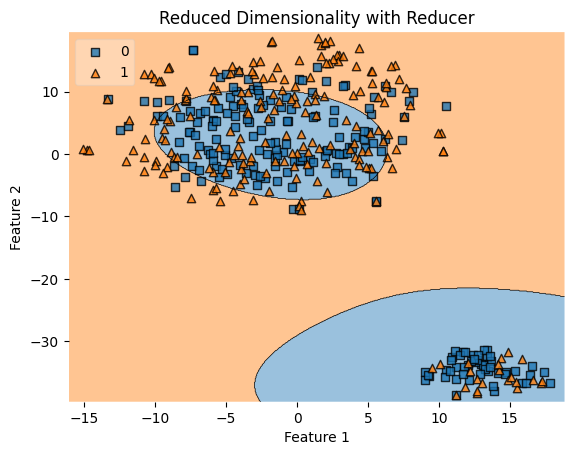

Number of misclassified images: 146


In [92]:
# Load your dataframe and perform your preprocessing here...
#     "australia_assa_02",
#     "swiss_landschlacht_01",
#     "alaska_haarp_62",
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list, dim_reducer="tsne")

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(
    clf, low_dim_features, df["is_burst"].values, df
)
print(f"Number of misclassified images: {len(df_missclassified)}")

In [117]:
df["below"] = np.where(low_dim_features[:, 1] < -30, True, False)

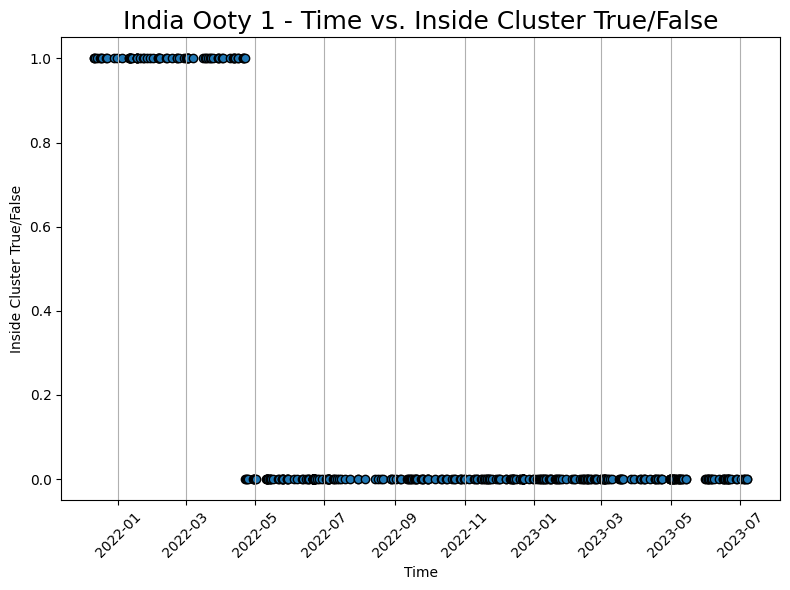

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(df["start_time"], df["below"], edgecolor="black")

plt.title("India Ooty 1 - Time vs. Inside Cluster True/False", fontsize=18)
plt.xlabel("Time")
plt.ylabel("Inside Cluster True/False")
plt.xticks(rotation=45)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

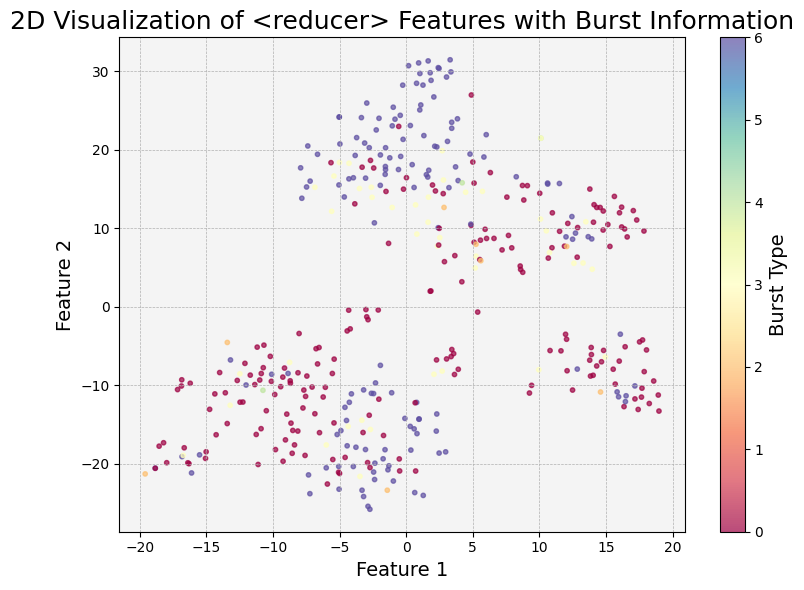

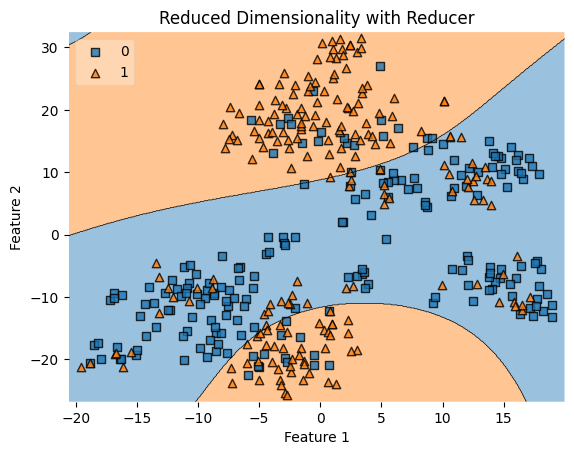

Number of misclassified images: 95


In [61]:
# Load your dataframe and perform your preprocessing here...
#     "australia_assa_02",
#     "swiss_landschlacht_01",
#     "alaska_haarp_62",
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list, dim_reducer="tsne")

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(
    clf, low_dim_features, df["is_burst"].values, df
)
print(f"Number of misclassified images: {len(df_missclassified)}")

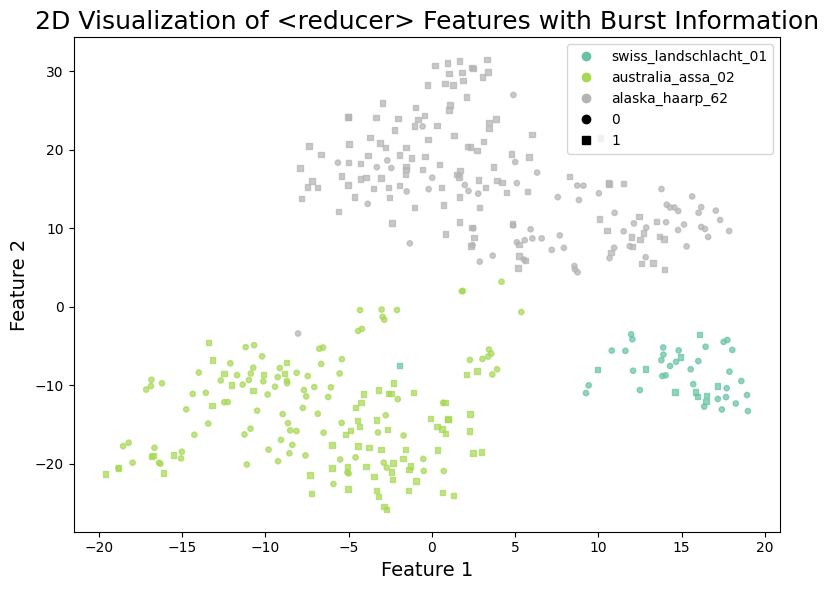

In [72]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(
    "2D Visualization of <reducer> Features with Burst Information", fontsize=18
)
ax.set_xlabel("Feature 1", fontsize=14)
ax.set_ylabel("Feature 2", fontsize=14)

# Markers for burst types
unique_burst_types = df["is_burst"].unique()
markers = ["o", "s", "^", "v", "D", "P", "*", "X"][
    : len(unique_burst_types)
]  # adjust markers as needed

# Colors for instruments (Using Set2 colormap for better differentiation)
unique_instruments = df["instrument"].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_instruments)))

# Map markers and colors to corresponding columns in dataframe
df["marker"] = df["is_burst"].map(dict(zip(unique_burst_types, markers)))
df["color"] = df["instrument"].map(dict(zip(unique_instruments, colors)))

for marker, burst_type in zip(markers, unique_burst_types):
    subset = df[df["marker"] == marker]
    ax.scatter(
        x=subset["low_dim_feature_1"],
        y=subset["low_dim_feature_2"],
        label=burst_type,
        c=subset["color"],
        s=15,
        alpha=0.7,
        marker=marker,
    )

# Creating a combined legend for the instruments' colors and the burst types' markers
from matplotlib.lines import Line2D

color_legend_elements = [
    Line2D([0], [0], color=color, marker="o", linestyle="", label=instrument)
    for color, instrument in zip(colors, unique_instruments)
]
marker_legend_elements = [
    Line2D([0], [0], color="black", marker=marker, linestyle="", label=burst_type)
    for marker, burst_type in zip(markers, unique_burst_types)
]

ax.legend(handles=color_legend_elements + marker_legend_elements, loc="upper right")

plt.tight_layout()
plt.show()

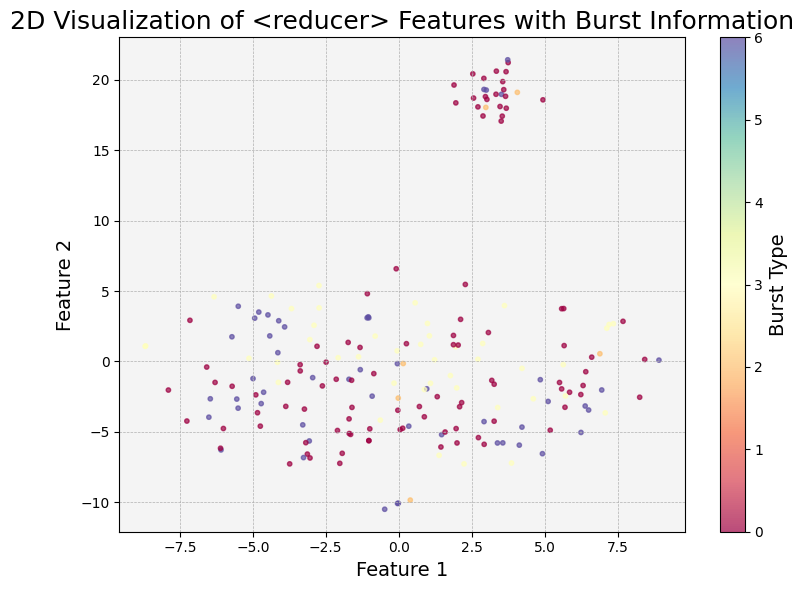

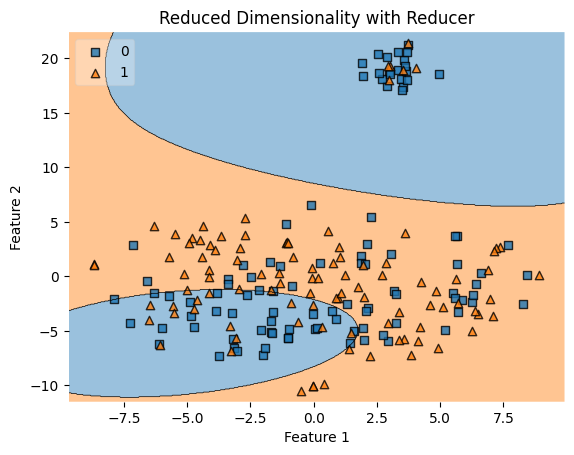

Number of misclassified images: 69


In [ ]:
# Load your dataframe and perform your preprocessing here...
# india_ooty_01
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list, dim_reducer="tsne")

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(
    clf, low_dim_features, df["is_burst"].values, df
)
print(f"Number of misclassified images: {len(df_missclassified)}")

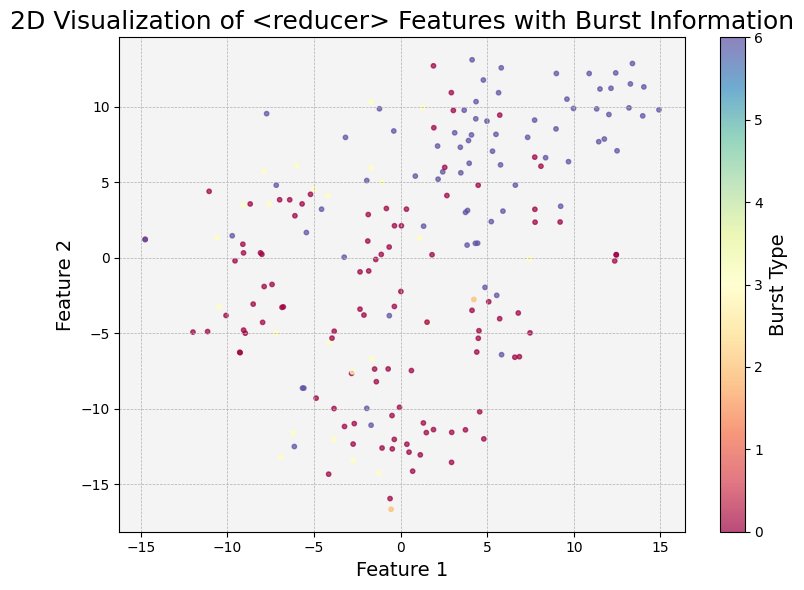

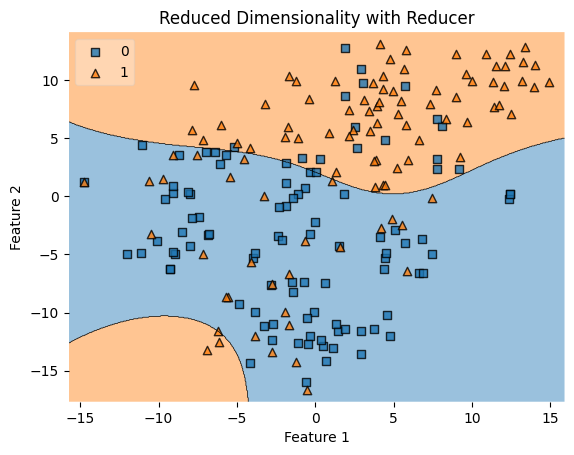

Number of misclassified images: 47


In [ ]:
# Load your dataframe and perform your preprocessing here...
# Alaska haarp
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list, dim_reducer="tsne")

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(
    clf, low_dim_features, df["is_burst"].values, df
)
print(f"Number of misclassified images: {len(df_missclassified)}")

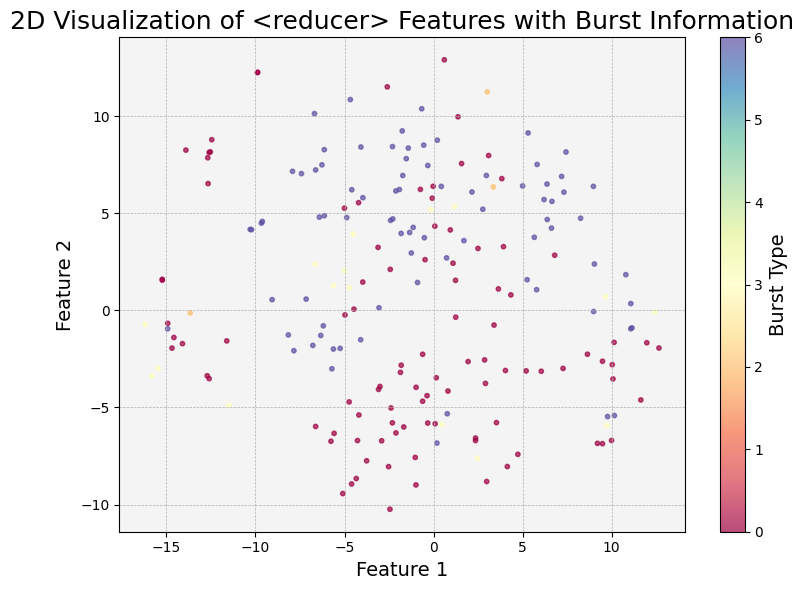

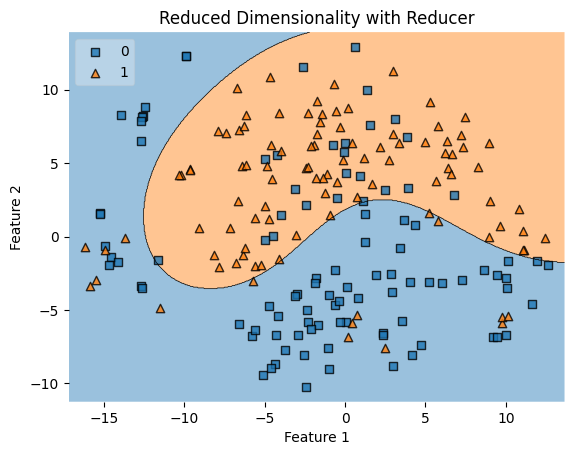

Number of misclassified images: 40


In [ ]:
# Load your dataframe and perform your preprocessing here...
# Australia assa 2
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list, dim_reducer="tsne")

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(
    clf, low_dim_features, df["is_burst"].values, df
)
print(f"Number of misclassified images: {len(df_missclassified)}")

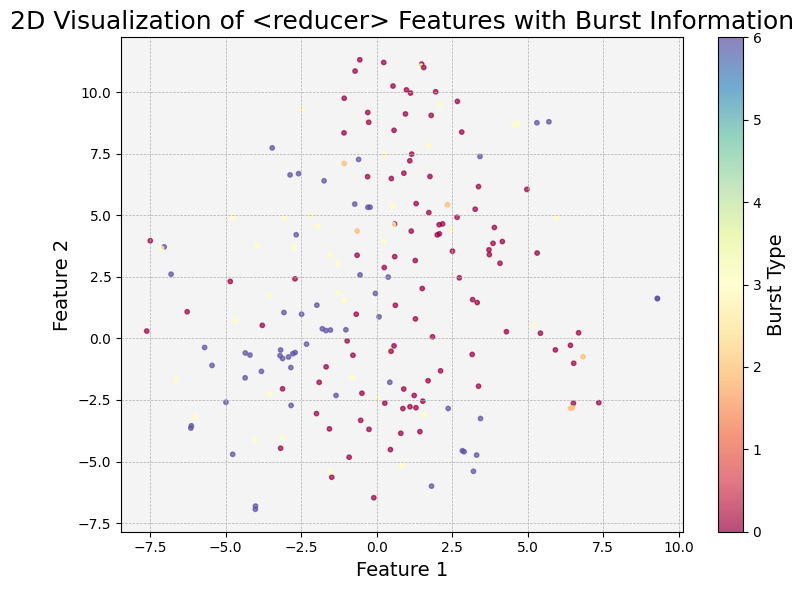

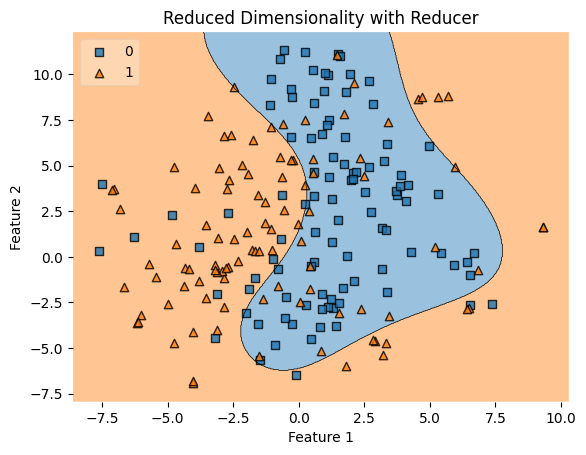

Number of misclassified images: 42


In [ ]:
# Load your dataframe and perform your preprocessing here...
# Swiss landschlacht 01
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list, dim_reducer="tsne")

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(
    clf, low_dim_features, df["is_burst"].values, df
)
print(f"Number of misclassified images: {len(df_missclassified)}")

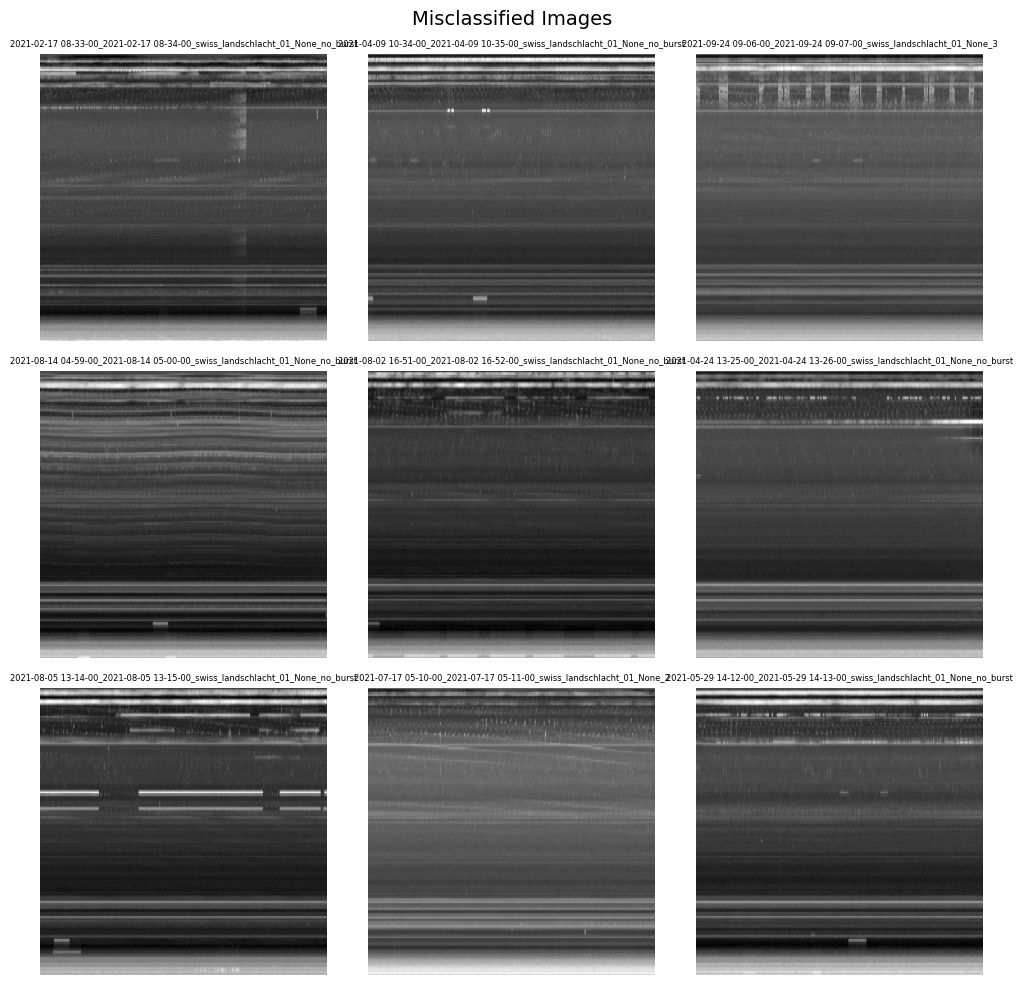

In [ ]:
df_missclassified = train_and_identify_misclassifications(
    clf, X=low_dim_features, y=df["is_burst"].values, df=df
)

# Displaying misclassified images
display_misclassified_images(df_missclassified)